In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('C:/Users/lenovo/aapl.csv')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df=df.tail(500)
df

,Date,Open,High,Low,Close,Adj Close,Volume
2018-10-05,2018-10-05,56.990002,57.102501,55.145000,56.072498,54.673214,134322000
2018-10-08,2018-10-08,55.552502,56.200001,55.049999,55.942501,54.546471,118655600
2018-10-09,2018-10-09,55.910000,56.817501,55.562500,56.717499,55.302128,107564000
2018-10-10,2018-10-10,56.365002,56.587502,54.012501,54.090000,52.740185,167962400
2018-10-11,2018-10-11,53.630001,54.875000,53.080002,53.612499,52.274609,212497600
...,...,...,...,...,...,...,...
2020-09-24,2020-09-24,105.169998,110.250000,105.000000,108.220001,108.220001,167743300
2020-09-25,2020-09-25,108.430000,112.440002,107.669998,112.279999,112.279999,149981400
2020-09-28,2020-09-28,115.010002,115.320000,112.779999,114.959999,114.959999,137672400
2020-09-29,2020-09-29,114.550003,115.309998,113.570000,114.089996,114.089996,99382200


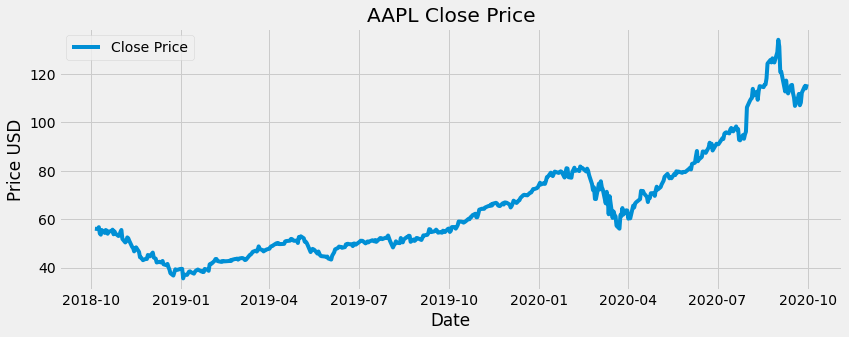

In [3]:
plt.figure(figsize=(12.5,4.5))
plt.plot(df['Close'],label='Close Price')
plt.title('AAPL Close Price')
plt.xlabel('Date')
plt.ylabel('Price USD')
plt.legend()
plt.show()

In [4]:
typical_price=(df['Close']+df['High']+df['Low'])/3

In [5]:
period=14

In [6]:
money_flow=typical_price*df['Volume']
money_flow

2018-10-05    7.536360e+09
2018-10-08    6.612776e+09
2018-10-09    6.062934e+09
2018-10-10    9.220576e+09
2018-10-11    1.144424e+10
                  ...     
2020-09-24    1.808664e+10
2020-09-25    1.661744e+10
2020-09-28    1.574330e+10
2020-09-29    1.136170e+10
2020-09-30    1.644842e+10
Length: 500, dtype: float64

In [7]:
positive_flow=[]
negative_flow=[]

In [8]:
for i in range(1,len(typical_price)):
    if typical_price[i]>typical_price[i-1]:
        positive_flow.append(money_flow[i-1])
        negative_flow.append(0)
    elif typical_price[i]<typical_price[i-1]:
        positive_flow.append(0)
        negative_flow.append(money_flow[i-1])
        
    else :
        positive_flow.append(0)
        negative_flow.append(0)

In [9]:
positive_mf=[]
negative_mf=[]

In [10]:
for i in range(period-1,len(positive_flow)):
    positive_mf.append(sum(positive_flow[i+1-period:i+1]))
                       
for i in range(period-1,len(negative_flow)):
    negative_mf.append(sum(negative_flow[i+1-period:i+1]))

In [11]:
mfi=100 * (np.array(positive_mf) / (np.array(positive_mf) + np.array(negative_mf) ) )

In [12]:
mfi

array([51.30804415, 51.79050119, 43.98952607, 42.53981854, 50.10532776,
       48.69260997, 46.97038322, 36.88608474, 40.19927533, 44.6579757 ,
       44.61955619, 39.73392752, 39.53510604, 39.09356936, 32.33149736,
       39.51444695, 46.39593731, 47.3170645 , 41.4722658 , 34.25927274,
       36.18681679, 40.89100558, 37.91131077, 38.29822223, 39.01339758,
       38.24845945, 44.43433841, 45.44199802, 46.14619713, 37.02375916,
       29.10969523, 37.91054502, 45.30031822, 53.95769755, 54.00057972,
       52.609959  , 52.3859822 , 46.15236867, 38.17014386, 37.17599209,
       28.35775915, 33.87896186, 41.45021233, 48.47607503, 54.65002397,
       47.41420201, 40.76623308, 44.49116204, 50.76121797, 57.14793697,
       56.72375787, 62.02110105, 63.38262871, 66.98270175, 78.63116526,
       78.37862737, 77.37897027, 76.47449559, 70.07902638, 70.7557812 ,
       72.64921845, 69.31261117, 60.58498318, 58.25964143, 58.4453793 ,
       60.27029263, 68.50906624, 74.63983047, 74.80476062, 75.43

In [13]:
df2=pd.DataFrame()
df2['MFI']=mfi

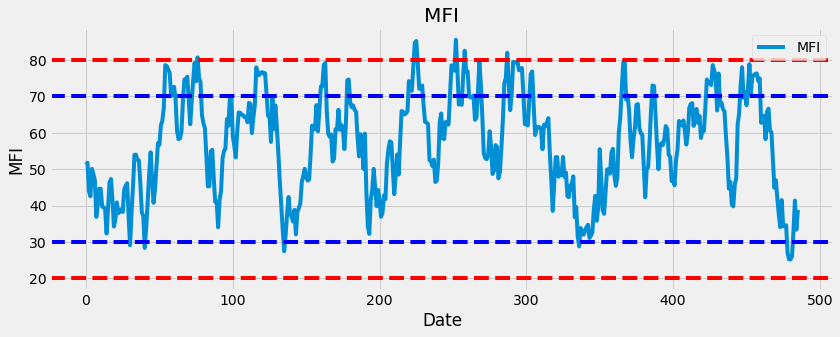

In [14]:
plt.figure(figsize=(12.5,4.5))
plt.plot(df2['MFI'],label='MFI')
plt.axhline(20,linestyle='--',color="r")
plt.axhline(30,linestyle='--',color="b")
plt.axhline(70,linestyle='--',color="b")
plt.axhline(80,linestyle='--',color="r")
plt.title('MFI')
plt.xlabel('Date')
plt.ylabel('MFI')
plt.legend()
plt.show()

Text(0.5, 1.0, 'MFI Visualizer')

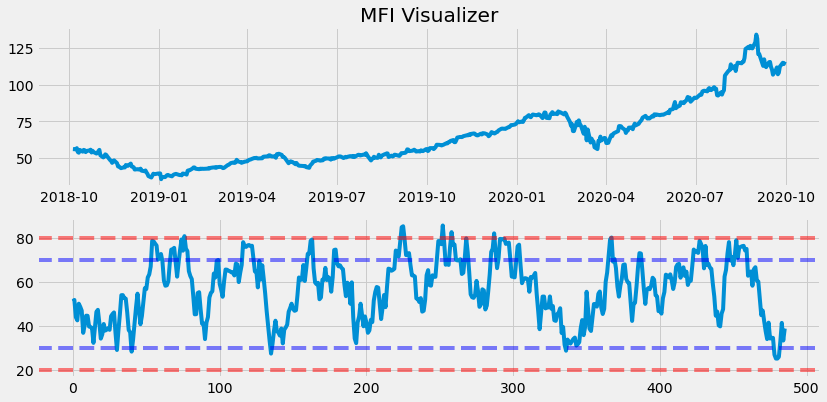

In [15]:
fig , (ax1 , ax2)=plt.subplots(nrows=2,ncols=1,figsize=(12.5,6))
ax1.plot(df['Close'],label='Close Price')
ax2.plot(df2['MFI'],label='MFI')
ax2.axhline(20,linestyle='--',color="r",alpha=0.5)
ax2.axhline(30,linestyle='--',color="b",alpha=0.5)
ax2.axhline(70,linestyle='--',color="b",alpha=0.5)
ax2.axhline(80,linestyle='--',color="r",alpha=0.5)
ax1.set_title('MFI Visualizer')